# Implementasi TinyML Pada Arduino Nano 33 BLE Sense Dengan Menggunakan Deep Neural Network Teroptimasi
<b>Hatma Suryotrisongko, S.Kom., M.Eng, Ph.D., Kevin Putra Santoso, Rafli Raihan Pramudya</b><br>
<i>Institut Teknologi Sepuluh Nopember Surabaya</i><br>
<i>Jl. Teknik Kimia, Keputih, Kec. Sukolilo, Kota Sby, Jawa Timur 60111</i>

## Mengimpor Library Yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Menyiapkan Data

In [2]:
audio_features = pd.read_csv('features.csv')
audio_features.head(10)

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc56,mfcc57,mfcc58,mfcc59,mfcc60,mfcc61,mfcc62,mfcc63,mfcc64,label
0,0.0,1681.532414,1680.805934,3543.630464,-386.69530,58.885944,20.434235,28.430403,-6.543071,-1.804826,...,0.073542,-0.097709,-0.255389,-0.112463,0.346833,0.418975,-0.373270,0.025089,0.428625,twenties
1,1.0,2020.193756,1424.773657,3422.301136,-268.86496,63.284850,-18.909096,14.215420,2.823777,-4.745179,...,0.191393,-0.067001,-0.538642,-1.534495,0.447655,0.323265,0.421459,-0.223714,-0.135467,seventies
2,0.0,1843.096456,1346.455698,3167.880639,-218.65076,54.647396,-34.087723,35.585747,-18.367844,-9.931020,...,0.136874,-1.122960,-0.744736,-0.445227,0.899421,0.020074,-0.678399,0.074347,0.107994,thirties
3,1.0,1461.189465,1498.902592,2983.635355,-283.73032,76.660830,15.407807,28.268713,-7.024139,-7.843547,...,-0.098889,-0.226142,-0.197733,0.227836,0.318534,-0.278193,0.070605,0.006450,-0.108097,sixties
4,1.0,1446.691044,1643.481467,2918.068910,-178.92532,87.650060,14.496930,7.610833,11.074960,5.889675,...,-0.106049,-0.197205,0.174795,-0.111371,0.132505,0.000568,-0.081714,-0.298213,-0.127580,fifties
5,1.0,2984.595200,1743.243442,4888.682666,-133.29343,19.028036,1.763993,14.152978,-4.493174,-4.575603,...,0.804109,-0.024186,0.256479,0.612732,0.506386,0.400573,0.693514,0.143063,0.008424,thirties
6,1.0,1938.933743,1610.194597,3823.153409,-223.34268,55.624268,-9.642693,19.422556,4.967085,-1.910220,...,-0.548606,-0.859438,-0.806916,-0.254314,-1.105535,-0.560585,0.635543,0.317530,0.874078,thirties
7,0.0,2187.491471,1719.260458,4048.119029,-138.10294,52.946450,-1.579655,26.081347,8.248919,-7.130556,...,0.395517,-0.064247,-0.626631,-0.004203,-0.644569,-0.681598,-0.413953,-0.407220,-0.353954,twenties
8,1.0,1894.619554,1392.854413,3361.292614,-210.93494,75.761610,-19.697887,28.655033,-7.240057,-13.831984,...,-0.905839,-0.634374,-0.762500,-0.120154,-0.690003,-0.836314,-0.064663,0.012296,-0.585096,twenties
9,1.0,1375.953133,1472.555055,2574.913727,-165.18628,85.020900,11.510531,13.469062,-5.280445,-10.045521,...,0.162787,0.042931,0.349893,0.118313,0.020360,0.021915,-0.281770,-0.112778,-0.266839,thirties


## Feature Engineering and Normalization

In [3]:
X = audio_features.copy().drop(columns=['gender','label'])
y_gender = audio_features.copy()['gender']
y_age = audio_features.copy()['label']

In [4]:
def minmax(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [5]:
X.head()

,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc55,mfcc56,mfcc57,mfcc58,mfcc59,mfcc60,mfcc61,mfcc62,mfcc63,mfcc64
0,1681.532414,1680.805934,3543.630464,-386.69530,58.885944,20.434235,28.430403,-6.543071,-1.804826,-12.135334,...,-0.499918,0.073542,-0.097709,-0.255389,-0.112463,0.346833,0.418975,-0.373270,0.025089,0.428625
1,2020.193756,1424.773657,3422.301136,-268.86496,63.284850,-18.909096,14.215420,2.823777,-4.745179,-21.438778,...,-0.243807,0.191393,-0.067001,-0.538642,-1.534495,0.447655,0.323265,0.421459,-0.223714,-0.135467
2,1843.096456,1346.455698,3167.880639,-218.65076,54.647396,-34.087723,35.585747,-18.367844,-9.931020,-20.953120,...,0.154141,0.136874,-1.122960,-0.744736,-0.445227,0.899421,0.020074,-0.678399,0.074347,0.107994
3,1461.189465,1498.902592,2983.635355,-283.73032,76.660830,15.407807,28.268713,-7.024139,-7.843547,-8.033633,...,0.247951,-0.098889,-0.226142,-0.197733,0.227836,0.318534,-0.278193,0.070605,0.006450,-0.108097
4,1446.691044,1643.481467,2918.068910,-178.92532,87.650060,14.496930,7.610833,11.074960,5.889675,7.431977,...,-0.580270,-0.106049,-0.197205,0.174795,-0.111371,0.132505,0.000568,-0.081714,-0.298213,-0.127580


In [6]:
X['spectral_centroid'] = standardize(X['spectral_centroid'])
X['spectral_rolloff'] = standardize(X['spectral_rolloff'])
X['spectral_bandwidth'] = minmax(X['spectral_bandwidth'])

for i in X.columns[3:]:
    X[i] = standardize(X[i])

## Feature Extraction Dengan Principal Component Analysis

In [7]:
pca = PCA(0.90)
X_PCA = pca.fit_transform(X)
X_PCA.shape

(73465, 46)

In [8]:
label_encoder = LabelEncoder()
y_age = label_encoder.fit_transform(y_age)
y_age = to_categorical(y_age)

## Split Data For the Train Set, Validation Set, and Test Set

In [9]:
X_train, X_valid, y_train_gender, y_valid_gender, y_train_age, y_valid_age, = train_test_split(X_PCA, 
                                                                                                y_gender, 
                                                                                                y_age, 
                                                                                                test_size= 0.3, 
                                                                                                random_state=142)

X_val, X_test, y_val_gender, y_test_gender, y_val_age, y_test_age = train_test_split(X_valid, y_valid_gender, y_valid_age, test_size=0.3, random_state=142)


## Build and Train Model

In [10]:
model_gender = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='gelu'),
    Dropout(0.3),
    Dense(64, activation='gelu'),
    Dropout(0.3),
    Dense(32, activation='gelu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])


model_age = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='gelu'),
    Dropout(0.3),
    Dense(256, activation='gelu'),
    Dropout(0.3),
    Dense(128, activation='gelu'),
    Dropout(0.3),
    Dense(8, activation='softmax')
])

model_gender.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_age.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_gender.fit(X_train, y_train_gender, 
                           epochs=50, batch_size=64, 
                           validation_data=(X_val, y_val_gender), 
                           callbacks=[earlyStop])
history_2 = model_age.fit(X_train, y_train_age, 
                          epochs=50, batch_size=64, 
                          validation_data=(X_val, y_val_age), 
                          callbacks=[earlyStop])

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.2775 - accuracy: 0.8958 - val_loss: 0.1998 - val_accuracy: 0.9214
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.2111 - accuracy: 0.9213 - val_loss: 0.1732 - val_accuracy: 0.9313
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.1906 - accuracy: 0.9284 - val_loss: 0.1595 - val_accuracy: 0.9368
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.1790 - accuracy: 0.9324 - val_loss: 0.1500 - val_accuracy: 0.9411
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.1660 - accuracy: 0.9350 - val_loss: 0.1438 - val_accuracy: 0.9429
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.1583 - accuracy: 0.9374 - val_loss: 0.1381 - val_accuracy: 0.9465
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.1527 - accuracy: 0.9395 - val_loss: 0.1315 - val_accuracy: 0.9479
Epoch 

## View Loss-Accuracy Graph and Model Evaluation

### View Loss-Accuracy Graph

In [11]:
def plot_loss_acc(hist, name='(undefined)'):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(8, 3))
    ax0.set_title('Loss Plot')
    ax0.plot(hist.history['loss'])
    ax0.plot(hist.history['val_loss'])
    ax0.grid()

    ax1.set_title('Acc Plot')
    ax1.plot(hist.history['accuracy'])
    ax1.plot(hist.history['val_accuracy'])
    ax1.grid()

    plt.suptitle(f'Loss-Accuracy Plot {name}', fontsize=12, y=1.05)

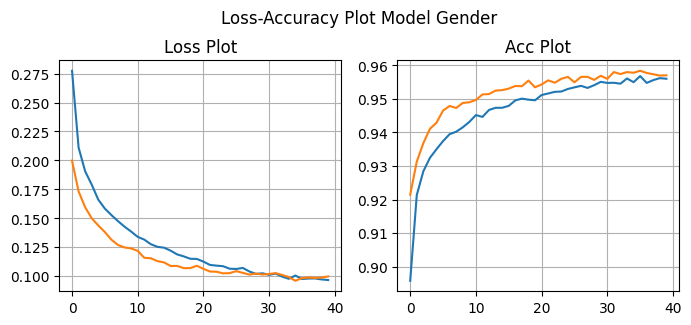

In [12]:
plot_loss_acc(history, "Model Gender")

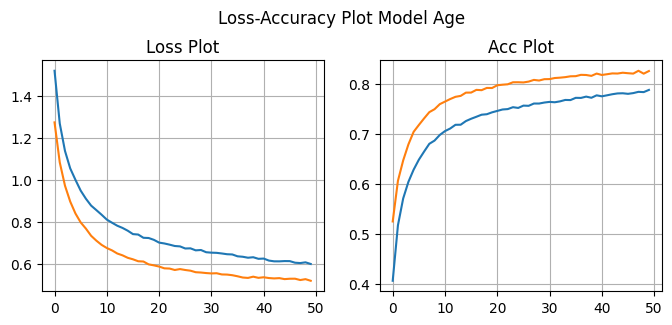

In [13]:
plot_loss_acc(history_2, "Model Age")

### Evaluasi Model Pada Test Set

In [14]:
y_gender_probabilities = model_gender.predict(X_test)
y_gender_pred = np.argmax(y_gender_probabilities, axis=1)

y_age_probabilities = model_age.predict(X_test)
y_age_pred = np.argmax(y_age_probabilities, axis=1)

207/207 [==============================] - 0s 919us/step


In [15]:
print("                   Report Model Gender")
print("========================================================")
print(classification_report(y_test_gender.reset_index(drop=True).astype(int), y_gender_pred))
print("========================================================")

                   Report Model Gender
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1740
           1       0.97      0.97      0.97      4872

    accuracy                           0.96      6612
   macro avg       0.95      0.94      0.95      6612
weighted avg       0.96      0.96      0.96      6612



In [16]:
y_test_age_ = []

for i in range(len(y_test_age)):
    y_test_age_.append(np.argmax(y_test_age[i]))

In [17]:
print("                   Report Model Age")
print("========================================================")
print(classification_report(y_test_age_, y_age_pred))
print("========================================================")

                   Report Model Age
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      0.85      0.87       884
           2       0.87      0.79      0.83       933
           3       0.90      0.87      0.89       153
           4       0.93      0.85      0.89       457
           5       0.88      0.59      0.70       470
           6       0.75      0.83      0.79      1621
           7       0.79      0.86      0.82      2078

    accuracy                           0.82      6612
   macro avg       0.88      0.81      0.84      6612
weighted avg       0.83      0.82      0.82      6612



## Save Model dan Konversi Ke Format TFLite, Serta Optimasi Model

Kita hanya akan mengimplementasikan model untuk klasifikasi umur saja, sehingga untuk model klasifikasi gender dapat kita abaikan untuk sementara waktu.

In [18]:
saved_model = "exp_saved_model"
tf.saved_model.save(model_age, saved_model)

INFO:tensorflow:Assets written to: exp_saved_model\assets


INFO:tensorflow:Assets written to: exp_saved_model\assets


In [19]:
import tensorflow_datasets as tfds

dataset_dict = {
    "train": tf.data.Dataset.from_tensor_slices((X_train, y_train_age)),
    "test": tf.data.Dataset.from_tensor_slices((X_test, y_test_age_))
}

dataset_dict["test"] = dataset_dict["test"].batch(1)

c:\Users\Kevin Putra Santoso\anaconda3\envs\avalon_tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
def inference_tflite(X_test, model):
    inference_res = []

    # Load TFLite model and allocate tensors.
    interpreter = tf.lite.Interpreter(model_content=model)
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    for i in range(len(X_test)):
        to_predict = tf.cast(np.array([X_test[i]]), tf.float32)
        # print(to_predict)
        interpreter.set_tensor(input_details[0]['index'], to_predict)
        interpreter.invoke()
        tflite_results = interpreter.get_tensor(output_details[0]['index'])
        # print(tflite_results)
        inference_res.append(np.argmax(tflite_results))
    
    return inference_res

In [21]:
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_data_gen():
    for input_value, _ in dataset_dict["test"].take(100):
        yield [tf.cast(input_value, tf.float32)]

converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

tflite_model = converter.convert()
tflite_model_file = 'optimized_age_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [22]:
inference_res_just_opt = inference_tflite(X_test, tflite_model)

Kita dapat melihat bahwa model yang awalnya berukuran 441 kilobyte berubah menjadi 116 kilobyte

In [24]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

q_aware_model = quantize_model(model_age)

q_aware_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLa  (None, 46)                3         
 yer)                                                            
                                                                 
 quant_dense_4 (QuantizeWra  (None, 256)               12039     
 pperV2)                                                         
                                                                 
 quant_dropout_3 (QuantizeW  (None, 256)               1         
 rapperV2)                                                       
                                                                 
 quant_dense_5 (QuantizeWra  (None, 256)               65799     
 pperV2)                                                         
                                                                 
 quant_dropout_4 (QuantizeW  (None, 256)              

In [25]:
history_quantized = q_aware_model.fit(X_train, y_train_age, 
                                     epochs=15, batch_size=64, 
                                     validation_data=(X_val, y_val_age), 
                                     callbacks=[earlyStop])

Epoch 1/15
804/804 [==============================] - 4s 4ms/step - loss: 0.6044 - accuracy: 0.7832 - val_loss: 0.5260 - val_accuracy: 0.8224
Epoch 2/15
804/804 [==============================] - 3s 4ms/step - loss: 0.6042 - accuracy: 0.7847 - val_loss: 0.5234 - val_accuracy: 0.8221
Epoch 3/15
804/804 [==============================] - 3s 4ms/step - loss: 0.6022 - accuracy: 0.7864 - val_loss: 0.5208 - val_accuracy: 0.8249
Epoch 4/15
804/804 [==============================] - 3s 4ms/step - loss: 0.6021 - accuracy: 0.7853 - val_loss: 0.5211 - val_accuracy: 0.8236
Epoch 5/15
804/804 [==============================] - 3s 4ms/step - loss: 0.5929 - accuracy: 0.7883 - val_loss: 0.5189 - val_accuracy: 0.8266
Epoch 6/15
804/804 [==============================] - 3s 4ms/step - loss: 0.5946 - accuracy: 0.7864 - val_loss: 0.5220 - val_accuracy: 0.8227
Epoch 7/15
804/804 [==============================] - 4s 4ms/step - loss: 0.5962 - accuracy: 0.7879 - val_loss: 0.5193 - val_accuracy: 0.8253
Epoch 

In [26]:
y_age_probabilities_quantized = q_aware_model.predict(X_test)
y_age_pred_quantized = np.argmax(y_age_probabilities_quantized, axis=1)

print("                   Report Model Age (Quantized)")
print("========================================================")
print(classification_report(y_test_age_, y_age_pred_quantized))
print("========================================================")

207/207 [==============================] - 0s 1ms/step
                   Report Model Age (Quantized)
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      0.86      0.87       884
           2       0.87      0.80      0.83       933
           3       0.93      0.86      0.89       153
           4       0.92      0.85      0.88       457
           5       0.83      0.66      0.73       470
           6       0.78      0.84      0.81      1621
           7       0.80      0.85      0.83      2078

    accuracy                           0.83      6612
   macro avg       0.88      0.82      0.85      6612
weighted avg       0.83      0.83      0.83      6612



In [27]:
# Model Hasil Kuantisasi (Tidak termasuk penambahan data representatif)

converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()
quantized_tflite_model_file = 'optimized-quantized_age_model.tflite'

with open(quantized_tflite_model_file, "wb") as f:
    f.write(quantized_tflite_model)

INFO:tensorflow:Assets written to: C:\Users\KEVINP~1\AppData\Local\Temp\tmpj01u06rl\assets


INFO:tensorflow:Assets written to: C:\Users\KEVINP~1\AppData\Local\Temp\tmpj01u06rl\assets
c:\Users\Kevin Putra Santoso\anaconda3\envs\avalon_tensorflow\lib\site-packages\tensorflow\lite\python\convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [28]:
inference_res_opt_quantized_only = inference_tflite(X_test, quantized_tflite_model)

In [29]:
# Model Hasil Kuantisasi + Penambahan Data Representatif

converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

quantized_tflite_model = converter.convert()
quantized_tflite_model_file = 'optimized-quantized-repdatagen_age_model.tflite'

with open(quantized_tflite_model_file, "wb") as f:
    f.write(quantized_tflite_model)

INFO:tensorflow:Assets written to: C:\Users\KEVINP~1\AppData\Local\Temp\tmpqt8lr4li\assets


INFO:tensorflow:Assets written to: C:\Users\KEVINP~1\AppData\Local\Temp\tmpqt8lr4li\assets
c:\Users\Kevin Putra Santoso\anaconda3\envs\avalon_tensorflow\lib\site-packages\tensorflow\lite\python\convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [30]:
inference_res_opt_quantized_repdatagen = inference_tflite(X_test, quantized_tflite_model)

## Komparasi Hasil Model Teroptimasi (Optimasi, Optimasi-Kuantisasi, Optimasi-Kuantisasi-Repdatagen)

In [31]:
print("                   Report Model Age (Optimasi)")
print("========================================================")
print(classification_report(y_test_age_, inference_res_just_opt))
print("========================================================")

                   Report Model Age (Optimasi)
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.90      0.85      0.87       884
           2       0.85      0.79      0.82       933
           3       0.91      0.88      0.89       153
           4       0.94      0.85      0.89       457
           5       0.86      0.60      0.71       470
           6       0.75      0.84      0.79      1621
           7       0.80      0.84      0.82      2078

    accuracy                           0.82      6612
   macro avg       0.87      0.82      0.84      6612
weighted avg       0.82      0.82      0.82      6612



In [33]:
print("            Report Model Age (Optimasi-Kuantisasi)")
print("========================================================")
print(classification_report(y_test_age_, inference_res_opt_quantized_only))
print("========================================================")

            Report Model Age (Optimasi-Kuantisasi)
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.87      0.86      0.87       884
           2       0.87      0.80      0.83       933
           3       0.93      0.86      0.89       153
           4       0.92      0.85      0.88       457
           5       0.83      0.66      0.73       470
           6       0.78      0.84      0.81      1621
           7       0.80      0.85      0.83      2078

    accuracy                           0.83      6612
   macro avg       0.88      0.82      0.85      6612
weighted avg       0.83      0.83      0.83      6612



In [34]:
print("   Report Model Age (Optimasi-Kuantisasi-Repdatagen)")
print("========================================================")
print(classification_report(y_test_age_, inference_res_opt_quantized_repdatagen))
print("========================================================")

   Report Model Age (Optimasi-Kuantisasi-Repdatagen)
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.87      0.86      0.87       884
           2       0.87      0.80      0.83       933
           3       0.93      0.86      0.89       153
           4       0.92      0.85      0.88       457
           5       0.83      0.66      0.73       470
           6       0.78      0.84      0.81      1621
           7       0.80      0.85      0.83      2078

    accuracy                           0.83      6612
   macro avg       0.88      0.82      0.85      6612
weighted avg       0.83      0.83      0.83      6612

